To get started on our research, we'll install some plotting and data analysis packages and import them

In [1]:
# Install various packages
!pip install pandas
!pip install geopandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install tabulate

You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kennyle/Desktop/Computer Science/HCDE/HCDE 410/FinalProject/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Next we'll define a custom function to read and clean our CSV data files since we need to do it
more than once. Then, we can read in our data.

In [3]:
def read_clean(csv):
    """
    Takes a CSV and returns a Pandas Dataframe of it without any missing values
    :param csv: A Comma Seperated Value file
    :return: a Pandas Dataframe
    """
    data = pd.read_csv(csv)
    data = data.replace('', np.nan, regex=True)
    return data.dropna()

In [ ]:
# Read in data
license_2012 = read_clean("data/2012_Business_License.csv")
license_2015 = read_clean("data/2015_Business_License.csv")
license_2021 = read_clean("data/2021_Business_License.csv")

Now that we have our data, let's go ahead and append a column to each dataframe with their
corresponding year so that it'll help us down the road with plotting and analysis (to know which
dataset the data came from).

In [ ]:
# Label each dataset with their associated year
license_2012['year'] = 2012
license_2015['year'] = 2015
license_2021['year'] = 2021

print(f"2012 License Data: \n {tabulate(license_2012.head(10), headers=license_2012.columns)}")
print()
print(f"2015 License Data: \n {tabulate(license_2015.head(10), headers=license_2015.columns)}")
print()
print(f"2021 License Data: \n {tabulate(license_2021.head(10), headers=license_2021.columns)}")

Now we can get started with investigating our research question:
How has Seattle's economy in different sectors changed over time as a result of the growing technology sector in recent years?

The first step is to get a count of the number of businesses per NAICS (a classification system of
companies used by countries in North America). We'll print out the top 10 NAICS groupings for 2012,
2015, and 2021.

In [24]:
license_2012_counts = license_2012.groupby(["naics_code", "NACISDesc"]).size()
license_2012_counts = license_2012_counts.reset_index(name="Count")
license_2012_counts.rename({"NACISDesc": "Description", "naics_code": "NAICS"}, axis=1, inplace=True)

license_2015_counts = license_2015.groupby(["NAICS Code", "NAICS Description"]).size()
license_2015_counts = license_2015_counts.reset_index(name="Count")
license_2015_counts.rename({"NACISDesc": "Description", "naics_code": "NAICS"}, axis=1, inplace=True)

license_2021_counts = license_2021.groupby(["NAICS Code", "NAICS Description"]).size()
license_2021_counts = license_2021_counts.reset_index(name="Count")
license_2021_counts.rename({"NACISDesc": "Description", "naics_code": "NAICS"}, axis=1, inplace=True)

top_10_2012 = license_2012_counts.sort_values('Count', ascending=False).head(10)
top_10_2015 = license_2015_counts.sort_values('Count', ascending=False).head(10)
top_10_2021 = license_2021_counts.sort_values('Count', ascending=False).head(10)

print(f"2012 NAICS Counts: \n {tabulate(top_10_2012, headers=license_2012_counts.columns)}")
print()
print(f"2015 NAICS Counts: \n {tabulate(top_10_2015, headers=license_2015_counts.columns)}")
print()
print(f"2021 NAICS Counts: \n {tabulate(top_10_2021, headers=license_2021_counts.columns)}")

2012 NAICS Counts: 
        NAICS  Description                                                             Count
---  -------  --------------------------------------------------------------------  -------
762   812990  All Other Personal Services                                              4254
470   453998  All Other Miscellaneous Store Retailers (except Tobacco Stores)          1463
493   485310  Taxi Service                                                             1459
726   722211  Limited-Service Restaurants                                              1374
587   541110  Offices of Lawyers                                                       1266
684   621399  Offices of All Other Miscellaneous Health Practitioners                  1052
 47   236115  New Single-Family Housing Construction (except Operative Builders)        969
630   541990  All Other Professional, Scientific, and Technical Services                933
608   541611  Administrative Management and General Managem

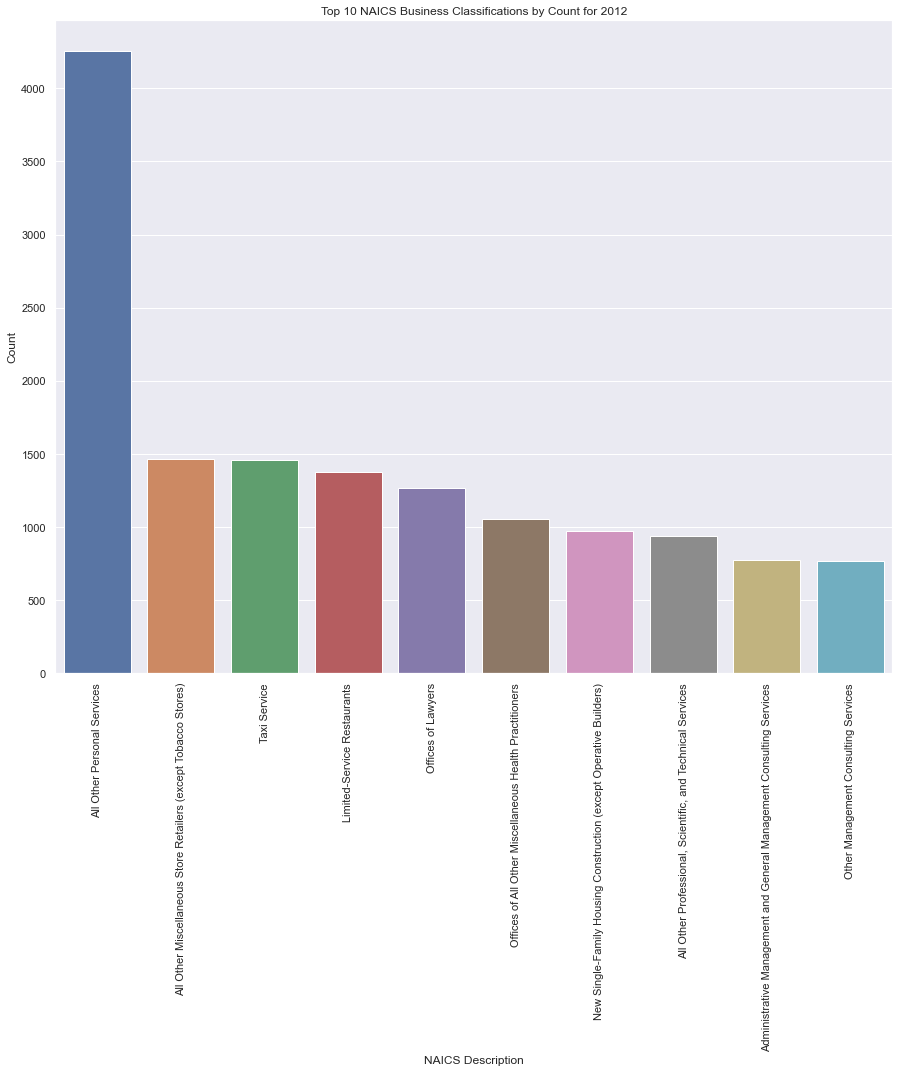

In [38]:
# Initialize Seaborn
sns.set()

# Create a plot for 2012 data
fig1, ax1 = plt.subplots(figsize=(15, 12))

# PLot 2012 Top 10 NAICS counts
sns.barplot(x="Description", y="Count", ax=ax1, data=top_10_2012)
plt.title("Top 10 NAICS Business Classifications by Count for 2012")
plt.xlabel("NAICS Description")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

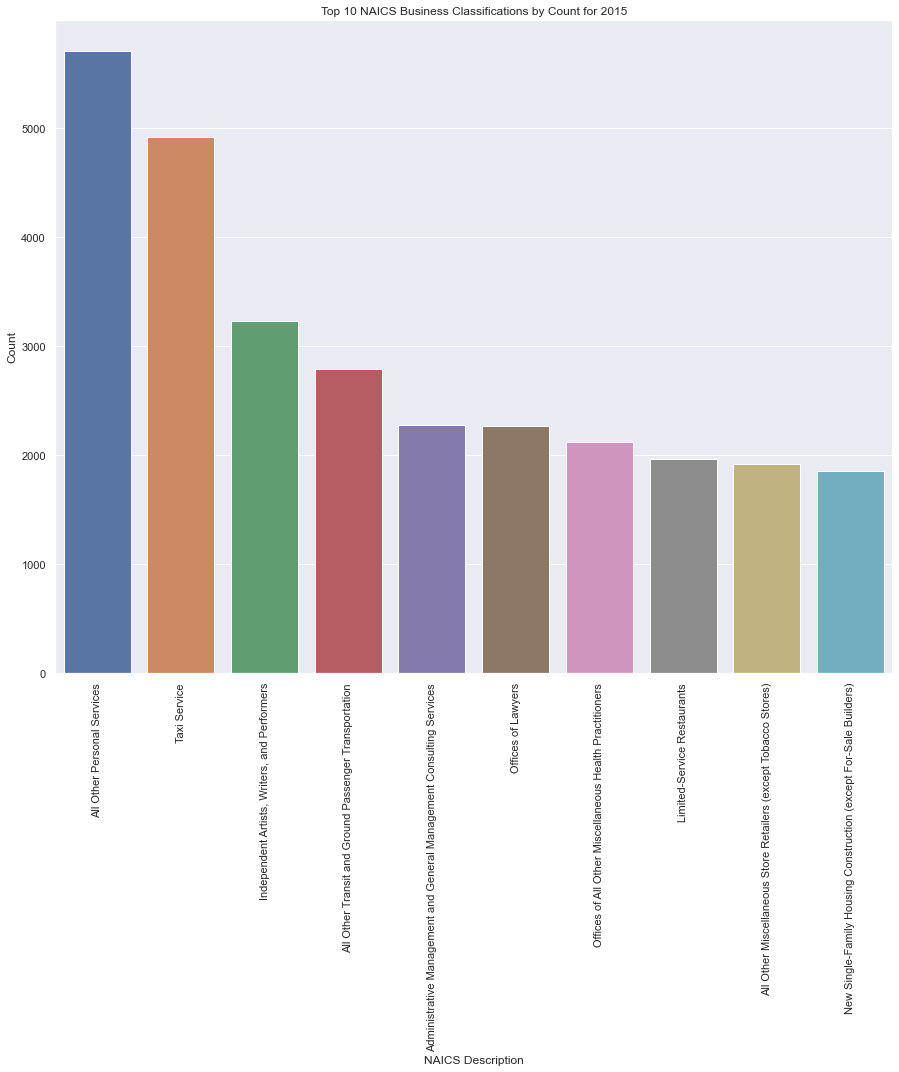

In [39]:
# Create a plot for 2015 data
fig2, ax2 = plt.subplots(figsize=(15, 12))

# PLot 2012 Top 10 NAICS counts
sns.barplot(x="NAICS Description", y="Count", ax=ax2, data=top_10_2015)
plt.title("Top 10 NAICS Business Classifications by Count for 2015")
plt.xlabel("NAICS Description")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

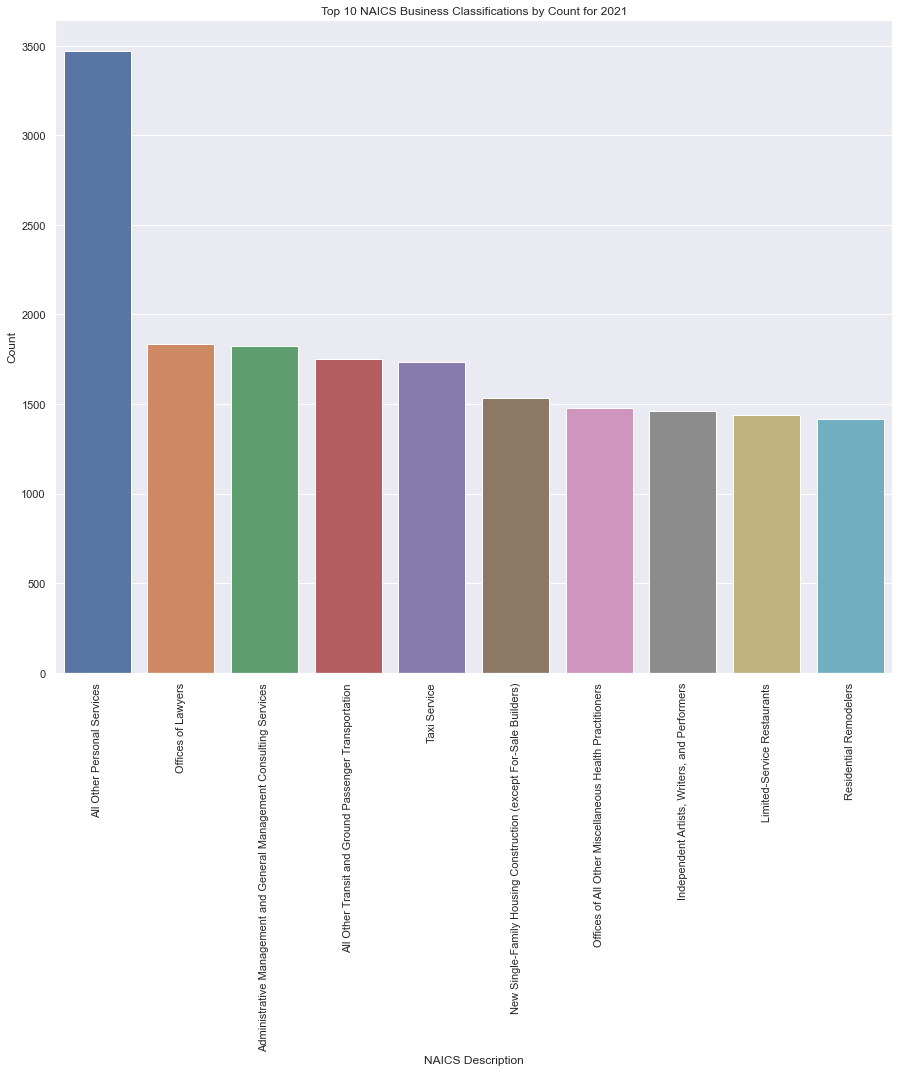

In [40]:
# Create a plot for 2021 data
fig3, ax3 = plt.subplots(figsize=(15, 12))

# PLot 2012 Top 10 NAICS counts
sns.barplot(x="NAICS Description", y="Count", ax=ax3, data=top_10_2021)
plt.title("Top 10 NAICS Business Classifications by Count for 2021")
plt.xlabel("NAICS Description")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [ ]:
license_2021

In [9]:
is_tech = license_2021['NAICS Code'] == 511210
license_2021[is_tech]

,Business Legal Name,Trade Name,Ownership Type,NAICS Code,NAICS Description,License Start Date,Street Address,City,State,Zip,Business Phone,City Account Number,UBI,year
133,180G LLC,180G,LLC - Multi Member,511210,Software Publishers,08/02/2012,8032 28TH AVE NE,SEATTLE,WA,98115-4640,510-629-1804,7493950660030,6.032276e+15,2021
1014,ABAJIAN AARON C,CRONOTE,Sole proprietorship,511210,Software Publishers,06/08/2019,905 NE 43RD ST # 212,SEATTLE,WA,98105-6019,909-910-7434,8375200752118,6.044604e+15,2021
2207,ADERANT NORTH AMERICA INC,ADERANT NORTH AMERICA INC,Corporation,511210,Software Publishers,01/01/1997,500 NORTHRIDGE RD,ATLANTA,GA,30350-3319,404-720-3651,7021830609649,6.016066e+15,2021
2599,AFS TECHNOLOGIES HOLDINGS INC,AFS TECHNOLOGIES HOLDINGS INC,Corporation,511210,Software Publishers,07/01/2013,5201 W KENNEDY BLVD # 200,TAMPA,FL,33609,602-522-8282,7675300679112,6.033176e+15,2021
2635,AGAINST GRAVITY CORP,REC ROOM INC.,Corporation,511210,Software Publishers,04/01/2016,300 ELLIOTT AVE W # STE 400,SEATTLE,WA,98119-4122,206-335-8602,8013000714300,6.036212e+15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100514,WRENCH INC,GETWRENCH.COM,Corporation,511210,Software Publishers,12/01/2015,701 5TH AVE # 7250,SEATTLE,WA,98104-7099,206-335-8054,7904630703047,6.035569e+15,2021
100673,WUNDERWUZZI LLC,WUNDERWUZZI LLC,LLC - Multi Member,511210,Software Publishers,04/23/2015,819 VIRGINIA ST # 2103,SEATTLE,WA,98101-4427,206-399-1259,7835360695841,6.034999e+15,2021
100838,XXV INC,SYNTHETIC MINDS,Corporation,511210,Software Publishers,01/02/2019,1601 5TH AVE,SEATTLE,WA,98101-3621,202-355-8862,8472620762435,6.043794e+15,2021
102169,ZIPLINE GAMES INC,ZIPLINE GAMES INC,Corporation,511210,Software Publishers,02/14/2011,11331 23RD AVE NE,SEATTLE,WA,98125-6631,206-701-1472,7356990645504,6.030704e+15,2021
